<a href="https://colab.research.google.com/github/IanneVFernandes/projeto-metodos/blob/main/parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Circuit Implementation of Synchronized Chaos with Applications to Communications**

**Grupo 3:**


*   Ianne Vitoria Cruz Fernandes (ivcf)
*   Rafa Albert de Carvalho (rac4)
*   Vladson Henrique Ribeiro Marinho (vhrm)

# Resumo

Neste projeto, investigamos o uso do sistema de Lorenz em sistemas de comunicação baseados em sincronização caótica, tomando como referência o artigo *Circuit Implementation of Synchronized Chaos with Applications to Communications*, de Cuomo e Oppenheim (1993).

O sistema de Lorenz, um exemplo clássico de caos determinístico, apresenta uma propriedade particularmente interessante: ele pode ser decomposto em dois subsistemas de resposta sincronizáveis. O artigo de referência explora como dois sistemas de Lorenz acoplados (transmissor e receptor) podem se sincronizar por meio de um sinal de controle comum, permitindo a reprodução fiel da dinâmica caótica entre ambos.

A simulação proposta busca demonstrar a aplicação dessa propriedade em um modelo preliminar de comunicação segura, no qual uma mensagem é mascarada por um sinal caótico e posteriormente recuperada por meio da sincronização entre os sistemas.

# Introdução e objetivos

Sistemas caóticos são sistemas dinâmicos determinísticos que exibem comportamento aparentemente aleatório devido à sua alta sensibilidade às condições iniciais. Em outras palavras, embora sua evolução temporal seja totalmente regida por leis matemáticas bem definidas, pequenas variações no estado inicial podem levar a trajetórias radicalmente diferentes ao longo do tempo. Essa propriedade, exemplificada pelo *efeito borboleta*, faz com que o comportamento de tais sistemas seja imprevisível a longo prazo, mesmo sendo matematicamente bem definido.

Essa combinação entre determinismo e imprevisibilidade torna os sistemas caóticos particularmente interessantes para aplicações em comunicações seguras. Como os sinais caóticos possuem aparência ruidosa e difícil de prever, eles podem ser utilizados para mascarar informações, dificultando a interpretação ou decodificação por terceiros. Em aplicações desse tipo, a informação a ser transmitida é incorporada a um sinal caótico, tornando-se indistinguível do ruído dinâmico do sistema.

Um aspecto ainda mais fascinante desses sistemas é a chamada **sincronização caótica**. Mesmo apresentando trajetórias imprevisíveis de forma individual, dois sistemas caóticos podem evoluir de maneira idêntica quando são acoplados por um sinal comum. Isso significa que um sistema "receptor" pode reproduzir fielmente o comportamento de um sistema "transmissor", desde que ambos compartilhem as mesmas equações e parâmetros. Essa propriedade abre caminho para a criação de esquemas de comunicação baseados em sincronização, nos quais um transmissor gera o sinal caótico que transporta a mensagem e um receptor sincronizado é capaz de recuperá-la com alta precisão.

Entre os modelos caóticos mais estudados, o **sistema de Lorenz** ocupa papel central. Sua simplicidade estrutural, combinada à capacidade de gerar dinâmicas complexas e imprevisíveis, o torna ideal para explorar os fundamentos do caos e de sua sincronização. O trabalho clássico de *Kevin M. Cuomo e Alan V. Oppenheim (1993)* demonstrou que é possível implementar circuitos eletrônicos capazes de sincronizar o comportamento caótico de dois sistemas Lorenz, abrindo novas possibilidades em comunicações seguras e criptografia analógica.

### Motivação

A possibilidade de usar caos determinístico para ocultar e transmitir informações de forma segura representa uma alternativa de baixo custo em relação a métodos criptográficos convencionais. Além disso, a modelagem e simulação de tais sistemas ajudam a compreender fenômenos de sincronização e estabilidade presentes em diversas áreas.

Portanto, este projeto busca conectar o estudo teórico de equações diferenciais com aplicações práticas de interesse científico e tecnológico.

### Objetivos

Temos como objetivos principais:

- Modelar um sistema caótico baseado em uma variação das equações de Lorenz;
- Resolver numericamente o sistema acoplado de equações diferenciais;
- Analisar graficamente as trajetórias do sistema no espaço de fases, para validar se é exibido indícios de comportamento caótico como definidos previamente;   
- Preparar a base para uma futura implementação de um modelo sincronizado onde será possível transmitir informação "criptografada".

### Critérios de sucesso

O projeto será considerado bem-sucedido se:

- As equações diferenciais forem resolvidas numericamente de forma estável e coerente;  
- As simulações apresentarem trajetórias caóticas típicas;  
- Os testes demonstrarem confiabilidade na transmissão da informação.

Mapa Mental: https://coggle.it/diagram/aRHqO-_j02aBCGxc/t/-/jM25uIYx9ISPzXm-ORfosvNoGp0Vt-psWlsFTx9mOXI

# Modelo

Proposto por Edward Lorenz em 1963 ao estudar a convecção térmica atmosférica, o modelo é descrito por um sistema acoplado de equações diferenciais não lineares:

$$
\begin{cases}
\dot x = \sigma (y-x) \\
\dot y = x(\rho - z) - y \\
\dot z = xy - \beta z
\end{cases}
$$

onde $x$, $y$ e $z$ são variáveis relacionadas à convecção do fluido; $\sigma$, $\rho$ e $\beta$ são parâmetros positivos que controlam a dinâmica do sistema; e $\dot x$, $\dot y$ e $\dot z$ são derivadas. Para determinados valores desses parâmetros, como $\sigma = 10$, $\beta = \frac{8}{3}$ e $\rho = 28$, o sistema apresenta comportamento caótico, caracterizado por trajetórias que nunca se repetem, mas permanecem confinadas a uma região limitada do espaço de fases, conhecida como atrator de Lorenz.

Além de ser um exemplo clássico de caos determinístico, o sistema de Lorenz pode ser decomposto em subsistemas sincronizáveis, o que o torna particularmente útil em estudos sobre sincronização caótica e transmissão segura de informações. Essa propriedade é explorada por *Cuomo e Oppenheim (1993)*, que implementaram uma versão eletrônica do sistema de Lorenz para demonstrar sua viabilidade em comunicações baseadas em sincronização caótica, abrindo caminho para aplicações reais em criptografia analógica e engenharia de sinais.

No modelo utilizado por *Cuomo e Oppenheim* há uma pequena transformação com o objetivo de reduzir a amplitude do gráfico das equações, com isso, surge um novo modelo ao assumir

$$
u = x/10 \\
v = y/10 \\
w = z/20 \\
$$

Após essa transformação, obtemos:
$$
\begin{cases}
\dot u = \sigma (v-u) \\
\dot v = \rho u - v - 20uw \\
\dot w = 5uv - \beta w
\end{cases}
$$

Para que a sincronização ocorra, esses parametros (σ, ρ e β) são replicados no modelo receptor, obtendo:
$$
\begin{cases}
\dot u_r = \sigma (v_r-u_r) \\
\dot v_r = \rho u - v_r - 20uw_r \\
\dot w_r = 5uv_r - \beta w_r
\end{cases}
$$

Nota-se que o $u_r$ só é utilizado para gerar o gráfico de $u_r(t)$ do receptor, utilizando o $u$ como "entrada" para as demais equações. Com isso podemos forçar uma sincronização entre os sistemas, por compartilharem de uma variável comum, o que é esperado dos acoplamentos de sistemas caóticos iguais.

Finalmente, para transmitir uma mensagem, o que se propõe é que no lugar de $u(t)$, uma nova variável $s(t)$ seja utilizada no lugar. Onde
$
s(t) = u(t) + m(t)
$
sendo m a mensagem a ser transmitida, modulada no tempo.

Essa perturbação do acoplamento gera um erro deterministico que é capaz de ser calculado $e_1=s(t) - u_r(t)$ e esse erro que carrega a mensagem.

Observando perturbações muito pequenas, percebemos que:
$$
e_1(t) = s(t) - u_r(t) \\
e_1(t) = u(t) + m(t) - u_r(t) \\
u(t) \approx u_r(t) ⇒ e1(t) \approx m1(t)
$$



## **Implementação dos modelos**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
# Definição do modelo de Lorenz
def lorenz_model(state, t, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return (dxdt, dydt, dzdt)

In [ ]:
# Sistema de Lorenz em um circuito eletrônico (u = x/10, v = y/10 e w =z/20):
def lorenz_model_transformed(state, t, sigma=10, rho=28, beta=8/3):
    u, v, w = state
    dudt = sigma * (v - u)
    dvdt = rho * u - v - 20 * u * w
    dwdt = 5 * u * v - beta * w
    return (dudt, dvdt, dwdt)

In [ ]:
# Condições iniciais
initial_state_lorenz1 = (1, 1, 1)
initial_state_lorenz2 = (1.01, 1, 1)
initial_state_lorenz3 = (1, 1, 1.01)

initial_state_lorenz_transformed = (0.1, 0.1, 0.05)
t = np.linspace(0, 100, 10000)


# Solução numérica das equações diferenciais
xyz = odeint(lorenz_model, initial_state_lorenz1, t)
pqr = odeint(lorenz_model, initial_state_lorenz2, t)
ijk = odeint(lorenz_model, initial_state_lorenz3, t)

# Separa as variáveis x, y, z
x, y, z = xyz.T

# Separa as variáveis p, q, r
p, q, r = pqr.T

# Separa as variáveis i, j, k
i, j, k = ijk.T

# Resolve o sistema do circuito eletrônico
uvw = odeint(lorenz_model_transformed, initial_state_lorenz_transformed, t)

## Separa as variáveis u, v, w
u, v, w = uvw.T

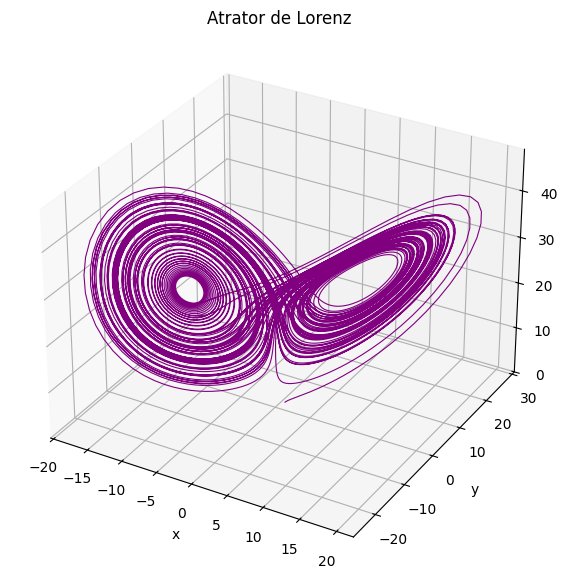

In [ ]:
# Plota o atrator de Lorenz1
fig1 = plt.figure(figsize=(10, 7))
ax = fig1.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.8, color='purple')
ax.set_title("Atrator de Lorenz")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

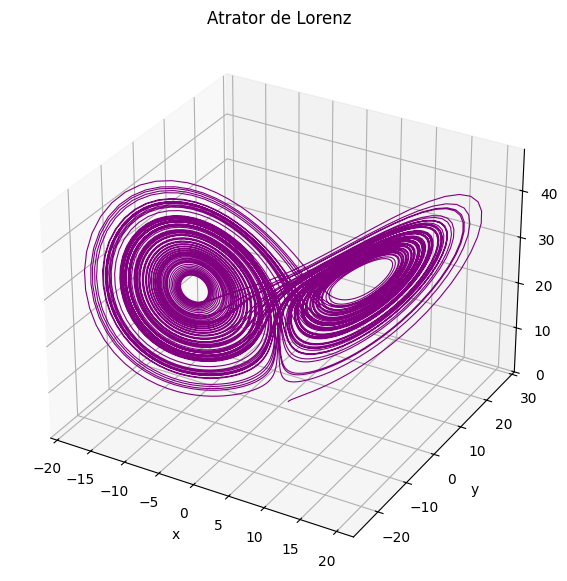

In [ ]:
# Plota o atrator de Lorentz2
fig1 = plt.figure(figsize=(10, 7))
ax = fig1.add_subplot(111, projection='3d')
ax.plot(p, q, r, lw=0.8, color='purple')
ax.set_title("Atrator de Lorenz")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

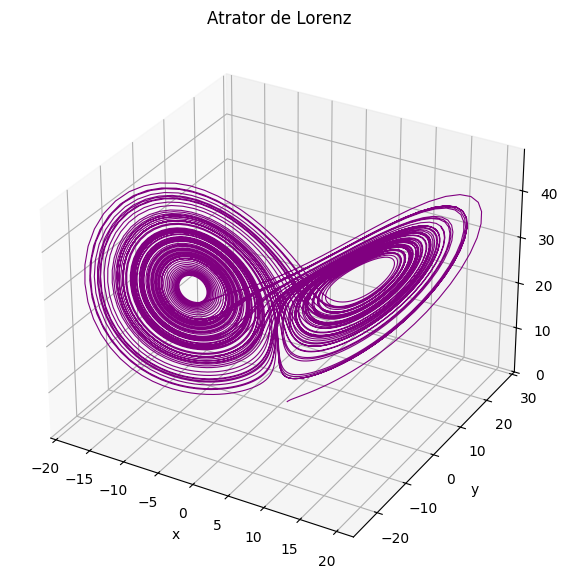

In [ ]:
# Plota o atrator de Lorenz3
fig1 = plt.figure(figsize=(10, 7))
ax = fig1.add_subplot(111, projection='3d')
ax.plot(i, j, k, lw=0.8, color='purple')
ax.set_title("Atrator de Lorenz")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

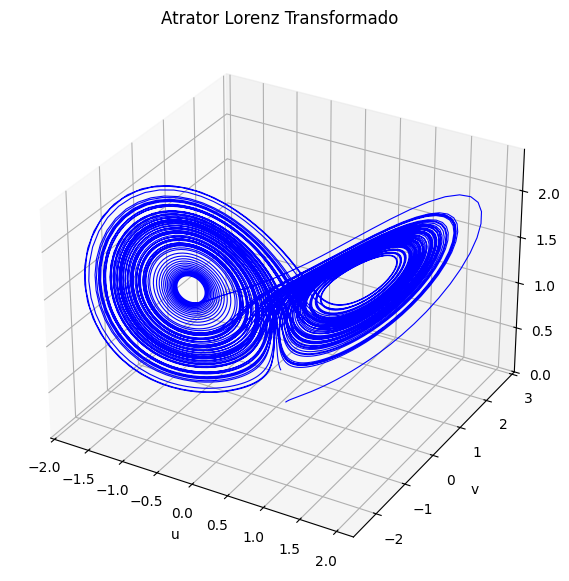

In [ ]:
# Plota o sistema de lorenz transformado:
fig2 = plt.figure(figsize=(10, 7))
ax = fig2.add_subplot(111, projection='3d')
ax.plot(u, v, w, lw=0.8, color='blue')
ax.set_title("Atrator Lorenz Transformado")
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_zlabel("w")
plt.show()

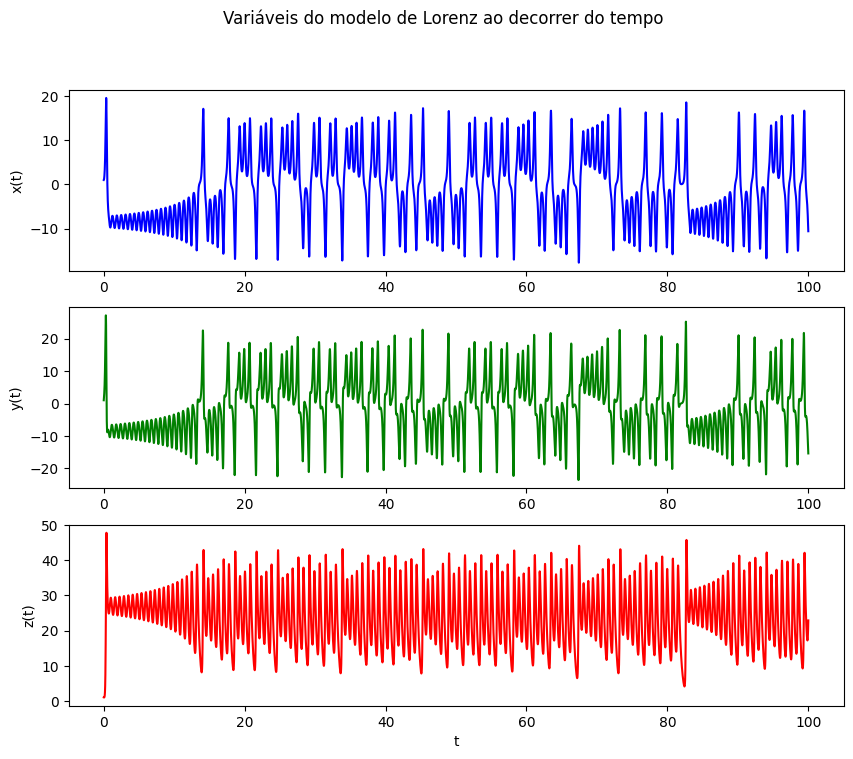

In [ ]:
# Cria uma figura com 3 subplots (um para cada variável)
_, axis = plt.subplots(3, 1, figsize=(10, 8))

axis[0].plot(t, x, label='x(t)', color='blue')
axis[0].set_ylabel('x(t)')

axis[1].plot(t, y, label='y(t)', color='green')
axis[1].set_ylabel('y(t)')

axis[2].plot(t, z, label='z(t)', color='red')
axis[2].set_xlabel('t')
axis[2].set_ylabel('z(t)')

plt.suptitle("Variáveis do modelo de Lorenz ao decorrer do tempo")

plt.show()

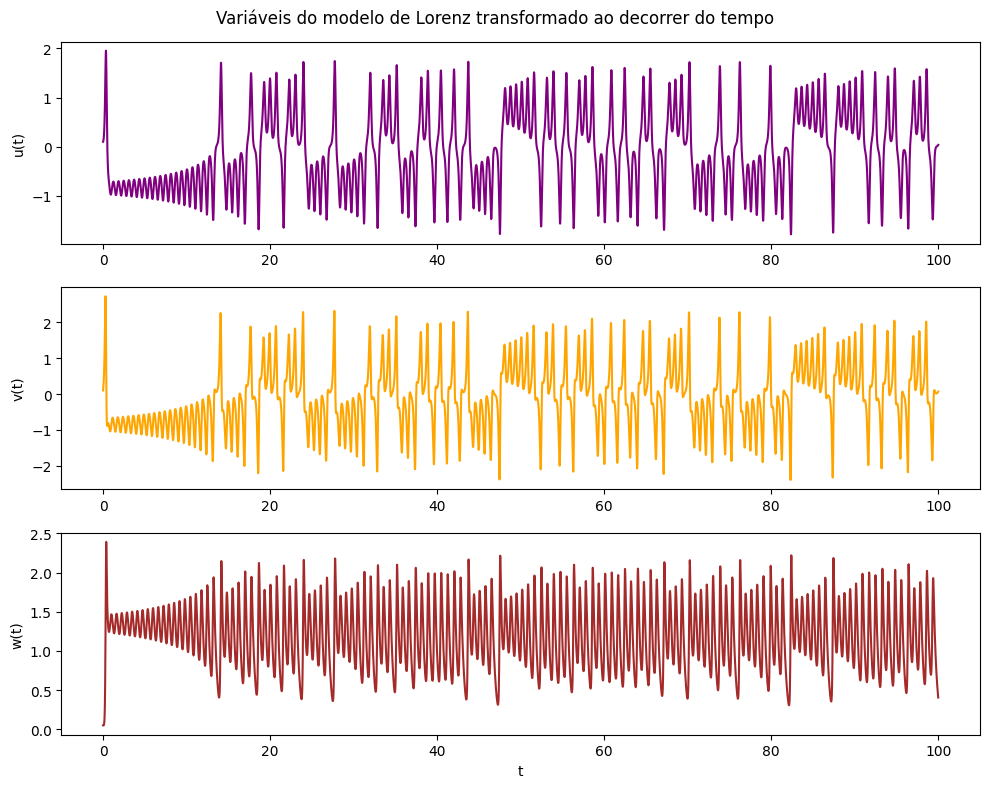

In [ ]:
# Cria uma figura com 3 subplots (um para cada variável)
_, axis = plt.subplots(3, 1, figsize=(10, 8))

axis[0].plot(t, u, label='u(t)', color='purple')
axis[0].set_ylabel('u(t)')

axis[1].plot(t, v, label='v(t)', color='orange')
axis[1].set_ylabel('v(t)')

axis[2].plot(t, w, label='w(t)', color='brown')
axis[2].set_xlabel('t')
axis[2].set_ylabel('w(t)')

plt.suptitle("Variáveis do modelo de Lorenz transformado ao decorrer do tempo")

plt.tight_layout()
plt.show()

## Resultados e Discussão

O sistema foi resolvido numericamente utilizado o método `odeint`, aplicado a uma versão modificada do modelo de Lorenz. Esse modelo, composto por três equações acopladas nas variáveis ($u(t)$, $v(t)$ e $w(t)$), descreve a evolução temporal de um sistema dinâmico não linear com comportamento caótico.

As simulações foram realizadas com condições iniciais simples e parâmetros clássicos ajustados, além de modificações que alteram ligeiramente os termos de acoplamento, conforme estudado por *Cuomo e Oppenheim (1993)*, de forma a permitir que o modelo possa ser implementado utilizando componentes eletrônicos.

Os resultados numéricos foram apresentados em projeções bidimensionais:  
- $u(t)$ vs. $v(t)$,  
- $v(t)$ vs. $w(t)$,  
- $u(t)$ vs. $w(t)$.  

Esses gráficos evidenciam que as trajetórias são complexas e não periódicas e que permanecem confinadas a uma região finita do espaço de estados, o que se encaixa na definição de sistemas caóticos. Diferente de um sistema oscilatório comum, o sistema de Lorenz não converge para um ponto fixo nem apresenta repetição de trajetória, no lugar disso, ele exibe uma evolução contínua e imprevisível, porém ainda regido por leis deterministicas.

O comportamento obtido demonstra de forma clara a sensibilidade às condições iniciais: pequenas variações nos valores iniciais de $u$, $v$ e $w$ resultam em trajetórias completamente diferentes ao longo do tempo. Isso é o caráter caótico do modelo e valida o uso de métodos numéricos estáveis (como `odeint`) para simular fenômenos não lineares.

De maneira qualitativa, os resultados reproduzem a dinâmica esperada para sistemas caóticos e permitem observar propriedades como:
- **Dependência não linear** entre as variáveis;  
- **Região de atração limitada**, onde as trajetórias permanecem confinadas;  
- **Ausência de periodicidade e alta complexidade temporal**;  
- **Sensibilidade extrema às condições iniciais**.

Essas observações reforçam a relevância do modelo de Lorenz como base para o estudo de **sincronização de caos**, tema central do trabalho de *Cuomo e Oppenheim (1993)*. A partir desses resultados preliminares, será possível avançar para o acoplamento entre dois sistemas caóticos (mestre e escravo) e investigar as condições sob as quais ocorre a sincronização, passo fundamental para explorar o uso do caos em **comunicações seguras**.


# Conclusão
Neste trabalho, foi estudado numericamente o sistema de Lorenz com base no artigo de *Cuomo e Oppenheim*, com o objetivo de compreender o comportamento caótico de sistemas descritos por equações diferenciais não lineares e sua aplicação no contexto de comunicações. A problemática inicial, a análise de sistemas dinâmicos complexos sem solução analítica fechada, foi abordada por meio da modelagem matemática e da aplicação de métodos numéricos adequados, permitindo uma investigação consistente da dinâmica do sistema.

As simulações realizadas possibilitaram a identificação das principais características do caos determinístico, como a sensibilidade às condições iniciais e a complexidade das trajetórias no espaço de fases. A análise do atrator e da evolução temporal das variáveis reforça a importância dos métodos numéricos na interpretação desses sistemas, evidenciando que pequenas variações nos parâmetros ou nas condições iniciais podem resultar em comportamentos significativamente distintos.

A extensão do estudo para sistemas de Lorenz acoplados permitiu analisar explicitamente o fenômeno da sincronização caótica, bem como o papel do erro de sincronização na transmissão e recuperação de mensagens. Os resultados obtidos mostram como a modulação de parâmetros no sistema transmissor se manifesta no receptor, possibilitando a reconstrução da informação transmitida e estabelecendo uma conexão direta entre o modelo matemático estudado e as aplicações descritas na literatura.

Dessa forma, o trabalho contribui para a compreensão dos princípios que fundamentam a sincronização de sistemas caóticos e demonstra como a modelagem matemática aliada à resolução numérica de equações diferenciais pode ser utilizada para analisar problemas complexos em engenharia. Além de atingir os objetivos propostos, o projeto reforça a relevância dos métodos numéricos como ferramentas essenciais tanto na formação acadêmica quanto na investigação de aplicações reais envolvendo sistemas dinâmicos não lineares.

Como possíveis trabalhos futuros, destaca-se a incorporação de efeitos mais próximos de implementações físicas, como ruído, atrasos e incertezas nos parâmetros, bem como a comparação sistemática entre diferentes métodos numéricos quanto à estabilidade e precisão em regimes caóticos. Essas extensões permitiriam aprofundar a análise apresentada e explorar de forma mais realista o uso da sincronização caótica em sistemas de comunicação.

# **Referências**

[1] K. M. Cuomo and A. V. Oppenheim, “Circuit implementation of synchronized chaos with applications to communications,” Physical Review Letters, vol. 71, no. 1, pp. 65–68, Jul. 1993.

[2] S. H. Strogatz, Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering, Part III — “Chaotic Dynamics,” 2nd ed. Boulder, CO: Westview Press, 2015, pp. 205–298.